In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, model_selection, preprocessing, pipeline, impute, feature_selection
from sklearn.experimental import enable_iterative_imputer
from itertools import chain, combinations, product
import scipy
import math
import time

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

import networkx as nx
#import graphviz

import random

import researchpy as rp
import scipy.stats as stats

In [2]:
# Constants
EPSILON = 0.001

In [3]:
data = pd.read_csv("insurance.csv")
#data = data.convert_dtypes()
data

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [4]:
#X = data[data.columns.drop(["RiskAversion", "Accident"])]
#y = data[["RiskAversion", "Accident"]]

target = ["Accident"]

X = data[data.columns.drop(target)]
y = data[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [5]:
app = X_train.copy()
app[target] = y_train

learner=gum.BNLearner(app)

bn = learner.learnBN()

bn=learner.useGreedyHillClimbing().useScoreK2().learnBN()

bn = gum.loadBN("insurance.bif")



In [6]:
#gum.generateSample(bn, 15000, "file2.csv",True, True, False)

#data = pd.read_csv("file2.csv")

gen = gum.BNDatabaseGenerator(bn)

gen.drawSamples(15000)

data = gen.to_pandas()

print(gen.log2likelihood())
print(np.exp(gen.log2likelihood()))




X = data[data.columns.drop(target)]
y = data[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

app = X_train.copy()
app[target] = y_train

-281757.6591388215
0.0


In [7]:
data

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Senior,UpperMiddle,Normal,Current,None,Football,None,FamilySedan,Normal,...,Secure,True,Thousand,Thousand,True,Thousand,Fair,True,Thousand,Zero
1,False,Adult,Prole,Adventurous,Older,None,EggShell,None,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Poor,False,Thousand,Many
2,False,Adult,Middle,Normal,Older,None,EggShell,None,SportsCar,Poor,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
3,False,Adult,Prole,Adventurous,Older,Moderate,Football,Moderate,FamilySedan,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many
4,False,Adult,Middle,Cautious,Older,None,Tank,None,FamilySedan,Excellent,...,Secure,True,Thousand,Thousand,False,Thousand,Good,False,Thousand,Zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,Adult,Middle,Normal,Older,None,EggShell,None,SportsCar,Normal,...,Rural,False,TenThou,Thousand,True,Thousand,Fair,False,Thousand,Zero
14996,False,Senior,Prole,Normal,Older,None,EggShell,None,Economy,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Poor,False,Thousand,Zero
14997,False,Adult,Prole,Cautious,Older,None,Tank,None,FamilySedan,Normal,...,City,True,Thousand,Thousand,False,Thousand,Good,False,Thousand,Zero
14998,False,Adult,Prole,Adventurous,Older,None,Football,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,False,Thousand,Fair,False,Thousand,Many


In [8]:
gnb.flow.add(gnb.getBN(bn,size="20"))
gnb.flow.display()

In [9]:
# ["DrivingSkill", "RiskAversion"], ["DrivHist"])
acc = 0
domain = sorted(np.unique(y_train.to_numpy()))
for i in X_test.index :
    ie=gum.LazyPropagation(bn)
    ie.addTarget("Accident")
    instance = X_test.loc[i]
    for j in X_test.columns :
        ie.addEvidence(j,str(instance[j]))
    ie.makeInference()
    post = ie.posterior("Accident")
    #print(post)
    #print(y_test.loc[i])
    acc = acc + post[domain.index(y_test.loc[i])]
print(acc / len(X_test.index))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
bn.dag().dSeparation(bn.nodeset(["DrivHist"]),bn.nodeset(["CarValue"]),bn.nodeset(["DrivingSkill", "RiskAversion"]))

In [ ]:
bn.nodeset(["OtherCarCost"])

In [10]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({"RiskAversion" : "Psychopath", "Accident" : "None"})
ie.evidenceProbability()
#print(ie.posterior(bn.idFromName("Accident")))


0.007787674345604355

In [11]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.addJointTarget(set(["Accident", "RiskAversion"]))
#ie.setEvidence({"RiskAversion" : "Psychopath"})
#ie.evidenceProbability()
print(ie.jointPosterior(set(["Accident", "RiskAversion"])))


      ||  Accident                             |
RiskAv||None     |Mild     |Moderate |Severe   |
------||---------|---------|---------|---------|
Psycho|| 0.0078  | 0.0021  | 0.0020  | 0.0030  |
Advent|| 0.1562  | 0.0310  | 0.0290  | 0.0431  |
Normal|| 0.3552  | 0.0399  | 0.0358  | 0.0504  |
Cautio|| 0.1967  | 0.0155  | 0.0136  | 0.0188  |



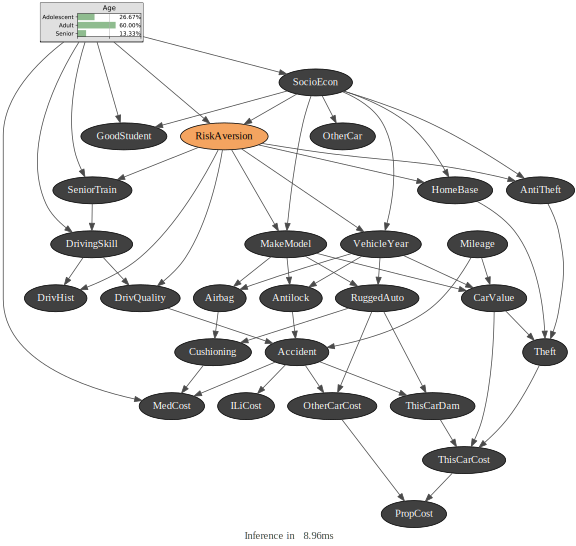

In [12]:
res = gnb.showInference(model = bn, engine = gum.LazyPropagation(bn), evs = {"RiskAversion" : "Psychopath"}, targets = ["Age"], view = "graph")


In [13]:
#bn.cpt(1).variable(1).domain()

bn.variableFromName("Age").labels()

('Adolescent', 'Adult', 'Senior')

In [14]:
ie=gum.LazyPropagation(bn)
#ie.makeInference()
ie.addEvidence("RiskAversion","Cautious")
ie.addJointTarget(set(["Accident", "ILiCost"]))
print(ie.jointPosterior(set(["Accident", "ILiCost"])))


      ||  Accident                             |
ILiCos||None     |Mild     |Moderate |Severe   |
------||---------|---------|---------|---------|
Thousa|| 0.8042  | 0.0633  | 0.0500  | 0.0615  |
TenTho|| 0.0000  | 0.0001  | 0.0028  | 0.0077  |
Hundre|| 0.0000  | 0.0000  | 0.0017  | 0.0046  |
Millio|| 0.0000  | 0.0000  | 0.0011  | 0.0031  |



In [15]:
l = np.unique(y_train.to_numpy())
print(sorted(l))

['Mild', 'Moderate', 'None', 'Severe']


In [16]:
def powerset(iterable,depth = np.inf):
    s = list(iterable)
    tmp = list(chain.from_iterable(combinations(s, r) for r in range(min(len(s),depth)+1)))
    return tmp

In [17]:
def omega(variable, data) :
    return list(data[variable].unique())

In [18]:
omega("Age",X)

['Senior', 'Adult', 'Adolescent']

In [19]:
def reduce_dataset(instance, X,y) :
    print(instance)
    columns = list(X.columns)
    #columns.remove("index")
    for i,value in enumerate(instance) :
        if isinstance(value, str) or not math.isnan(value) :
            print(columns[i], " is evidence!")
            X = X[X[columns[i]] == value]
            X = X.drop(columns[i], axis=1)
        else :
            print(columns[i], " is unobserved")
    y = y[[j for j in y.index if j in X.index]]
    return X,y

In [20]:
def equal_sets(set1,set2) :
    if len(set1) != len(set2) :
        return False
    for i in set1 :
        if i not in set2 :
            return False
    return True

def list_diff(list1, list2) :
    diff = []
    for i in list1 :
        if i not in list2 :
            diff.append(i)
    return diff

def prune_network(bn, ev_vars, hyp_vars, supp_vars = None) :
    #IMPORTANT: Hard copy of the bn
    bn_pr = gum.BayesNet(bn)
    # Find supplementary nodes of a network if not given
    
    if supp_vars is None :
        supp_vars = []
        for i in bn_pr.names() :
            if not i in ev_vars and not i in hyp_vars :
                supp_vars.append(i)
    # Delete from the network the nodes that are conditionally independent from the hypothesis variables (target) given the evidence
    dsep_nodes = []
    for i in supp_vars :
        if bn_pr.isIndependent(i,hyp_vars,ev_vars):
            dsep_nodes.append(i)
    for i in dsep_nodes :
        bn_pr.erase(i)
    return bn_pr, dsep_nodes

def map_query(bn, ev_vars, hyp_vars) :
    return propagate_evidence(bn, ev_vars, joint_targets = [hyp_vars]).jointPosterior(set(hyp_vars))


def propagate_evidence(bn, ev_vars, joint_targets = []) :
    ie=gum.ShaferShenoyInference(bn)
    for i in joint_targets :
        ie.addJointTarget(set(i))
    ie.setEvidence(ev_vars)
    ie.makeInference()
    return ie
            
    
def omega(variables, data = None , bn = None) :
    domains = []
    if bn is not None :
        for variable in variables :
            domains.append(sorted(bn.variableFromName(variable).labels()))
    else :
        for variable in variables :
            domains.append(sorted(data[variable].unique()))
    return [p for p in product(*domains)]
    

def prepare_mapi(instances, variables) :
     #Type checking
    if isinstance(instances, pd.core.frame.DataFrame) :
        instances = instances.to_numpy()
    #Array for each instance
    evidence_set = []
    # For each instance:
    for instance in instances :
        # Check which are the evidence variables
        evidence = dict()
        for i,value in enumerate(instance) :
            if isinstance(value, str) or not math.isnan(value) :
                evidence[variables[i]] = value
        evidence_set.append(evidence)
    return evidence_set
    

# True if R is relevant/MAP-dependent
# False if R is irrelevant/MAP-independent
def map_dependence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = None, hyp_posterior = None, return_jsd = False) : 
    # Check which are the supplementary (missing) variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
    # Check if R in unobserved
    #print(supp_vars)
    for R in set_R :
        if R not in supp_vars :
            raise Exception("The variable", R, "is in the set R but is not a supplementary node")
    y = hyp_vars_assign
    posterior = hyp_posterior
    if y is None :    
        # Perform a MAP-query and get the argmax from the posterior. 
        # Check if a posterior for P(H|e) was provided
        if hyp_posterior is None :
            posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
            y = posterior.argmax()[0][0]
        else :
            y = posterior.argmax()[0][0]
    # Obtain domain of R
    omega_R = omega(set_R, bn = bn)
    # For each value assignment r in omega(R)
    jsd = 0
    for value_assignment_r in omega_R :
        # Fill in values
        ev_vars_alt = ev_vars.copy()
        for i,value in enumerate(value_assignment_r) :
            ev_vars_alt[set_R[i]] = value
        #print(instance)
        #print(instance_alt)
        # Inference with evidence and r
        posterior_alt = None
        try :
            posterior_alt = map_query(bn, ev_vars = ev_vars_alt, hyp_vars = hyp_vars)
        except :
            if return_jsd :
                return False, 1
            else :
                return False
        y_alt = posterior_alt.argmax()[0][0]
        # Check if we need to compute the jsd divergence between P(H|e) and P(H|e,r)
        if return_jsd :
            jsd = max(jsd, JSD(posterior,posterior_alt))
        # Comparar con prediccion de instance
        #print(value_assignment_r)
        #print(y, " == ", y_alt)
        #print(posterior.argmax()[1], "--", posterior_alt.argmax()[1])
        if y != y_alt :
            if return_jsd :
                return True, jsd
            else :
                return True
    if return_jsd:
        return False, jsd
    else :
        return False
    
def map_independence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = None, hyp_posterior = None, return_jsd = False) : 
    if return_jsd :
        mapd, jsd = map_dependence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = hyp_vars_assign,
                                   hyp_posterior = hyp_posterior, return_jsd = True)
        return (not mapd, jsd)
    else :
        return not map_dependence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = hyp_vars_assign,
                                  hyp_posterior = hyp_posterior, return_jsd = False)

def e_map_independence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = None, hyp_posterior = None, return_jsd = False) : 
    # Check which are the supplementary (missing) variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
    # Check if R in unobserved
    #print(supp_vars)
    for R in set_R :
        if R not in supp_vars :
            raise Exception("The variable", R, "is in the set R but is not a supplementary node")
    y = hyp_vars_assign
    posterior = hyp_posterior
    if y is None :    
        # Perform a MAP-query and get the argmax from the posterior. 
        # Check if a posterior for P(H|e) was provided
        if hyp_posterior is None :
            posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
            y = posterior.argmax()[0][0]
        else :
            y = posterior.argmax()[0][0]
    # Obtain domain of R
    omega_R = omega(set_R, bn = bn)
    # For each value assignment r in omega(R)
    jsd = 0
    for value_assignment_r in omega_R :
        # Fill in values
        ev_vars_alt = ev_vars.copy()
        for i,value in enumerate(value_assignment_r) :
            ev_vars_alt[set_R[i]] = value
        # Inference with evidence and r
        posterior_alt = map_query(bn, ev_vars = ev_vars_alt, hyp_vars = hyp_vars)
        # Compute the jsd divergence between P(H|e) and P(H|e,r)
        jsd = max(jsd, JSD(posterior,posterior_alt))
    return jsd

In [21]:
#print(bn.dag().dSeparation(bn.nodeset(["DrivHist"]),bn.nodeset(["CarValue"]),bn.nodeset(["DrivingSkill", "RiskAversion"])))
bn_pr,_ = prune_network(bn, ["DrivingSkill", "RiskAversion"], ["DrivHist"])
#bn_pr.names
print(bn.names())
print(bn_pr.names())
print(bn.isIndependent(["DrivHist"],["CarValue"],["DrivingSkill", "RiskAversion"]))

{'VehicleYear', 'HomeBase', 'Age', 'RiskAversion', 'RuggedAuto', 'ILiCost', 'ThisCarDam', 'OtherCar', 'ThisCarCost', 'AntiTheft', 'Mileage', 'Antilock', 'SocioEcon', 'OtherCarCost', 'DrivQuality', 'GoodStudent', 'SeniorTrain', 'CarValue', 'Accident', 'MakeModel', 'DrivingSkill', 'DrivHist', 'Airbag', 'MedCost', 'Cushioning', 'PropCost', 'Theft'}
{'DrivingSkill', 'DrivHist', 'RiskAversion'}
True


In [22]:
map_query(bn, ev_vars = {'RiskAversion':"Psychopath"}, hyp_vars = ["Accident"]).argmax()[0][0]

{'Accident': 0}

In [23]:
map_independence(bn, ["ILiCost"], {'RiskAversion':"Psychopath"}, ["Accident"])

False

In [24]:
omega(["RiskAversion", "DrivingSkill"], bn = bn)

[('Adventurous', 'Expert'),
 ('Adventurous', 'Normal'),
 ('Adventurous', 'SubStandard'),
 ('Cautious', 'Expert'),
 ('Cautious', 'Normal'),
 ('Cautious', 'SubStandard'),
 ('Normal', 'Expert'),
 ('Normal', 'Normal'),
 ('Normal', 'SubStandard'),
 ('Psychopath', 'Expert'),
 ('Psychopath', 'Normal'),
 ('Psychopath', 'SubStandard')]

In [25]:
def check_every_r_bn(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    #bn_pr, dsep_by_ev = prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars)
    dsep_by_ev = []
    bn_pr = bn
    #print(dsep_by_ev)
    
    #tmp = supp_vars
    #supp_vars = []
    
    #for i in tmp :
    #    if i not in dsep_by_ev :
    #        supp_vars.append(i)
    
    S = powerset(supp_vars,depth = depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
        
    # Variables to store relevant/irrelevant sets
    relevant_sets = []
    irrelevant_sets = []
    
    # Get the posterior and the argmax from the original MAP-query
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    for i in range(0,len(S_split)) :
        for j in S_split[i] :
            # If relevant
            #print(list(j))
            if map_dependence(bn_pr, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_vars_assign=y) :
                relevant_sets.append(j)
            # If irrelevant
            else :
                irrelevant_sets.append(j)
    return relevant_sets, irrelevant_sets

In [86]:
def get_c_exp(bn, ev_vars, hyp_vars, hyp_vars_assign = None) : 
    if hyp_vars_assign is None :
        posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
        hyp_vars_assign = posterior.argmax()[0][0]
    
    # Alternative. First compute P(H|e) and then P(e) and compute the product
    ie=gum.ShaferShenoyInference(bn)
    ie.addJointTarget(set(hyp_vars))
    ie.setEvidence(ev_vars)
    ie.makeInference()
    post = ie.jointPosterior(set(hyp_vars))

    # Compute P(e)
    ie=gum.ShaferShenoyInference(bn)
    ie.setEvidence(ev_vars)
    ie.makeInference()
    p_e = ie.evidenceProbability()
    if p_e < 0.0000001 :
        p_e = 0.0000001
    
    post = post * p_e
    inst = gum.Instantiation(post)
    inst.fromdict(hyp_vars_assign)
    P_eh = post.get(inst)
    return post/P_eh

def decomposition_prune(relevant_set, S_split, relevant_sets) :
    i = len(relevant_set)
    for k in range(i,len(S_split)) :
        tmp = []
        for l in S_split[k] :
            if not set(relevant_set).issubset(set(l)) :
                tmp.append(l)
        S_split[k] = tmp
    return S_split, relevant_sets

def conditional_independence_prune(bn,supp_vars,hyp_vars,ev_vars,irrelevant_set, S_split, irrelevant_sets,depth) :
    # Delete from the network the nodes that are conditionally independent from the hypothesis variables (target) given the evidence
    dsep_nodes = []
    for i in supp_vars :
        if i not in irrelevant_set and bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+list(irrelevant_set)):
            dsep_nodes.append(i)
    
    if len(dsep_nodes) == 0 :
        return S_split, irrelevant_sets
    irrels = powerset(dsep_nodes,depth)
    irrels.pop(0)
    irrels.pop()
    
    for i in irrels :
        try:
            S_split[len(i)-1].remove(i)
        except ValueError:
            pass  # do nothing!
    if irrels[-1] not in irrelevant_sets :
        irrelevant_sets.append(i)
    return S_split, irrelevant_sets

def check_every_r_silja(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)

    # Variables to store relevant/irrelevant sets
    relevant_sets = []
    irrelevant_sets = []
    
    # Delete the ones conditionally independent. d-separation is giving trouble right now. We will delete in the future
    dsep_by_ev = [] #= prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars)
    bn_pr = bn
    
    tmp = supp_vars
    supp_vars = []
    
    for i in tmp :
        if bn_pr.isIndependent(i,hyp_vars,list(ev_vars.keys())) :
            dsep_by_ev.append(i)
        else :
            supp_vars.append(i)
    
    if len(supp_vars) == 0 :
        return [],dsep_by_ev
    
    # Put first the vars in the Markov Blanket
    mb = set()
    for i in hyp_vars :
        mb = mb.union(gum.MarkovBlanket(bn_pr, i).nodes())
    mb_names = []
    for i in mb :
        mb_names.append(bn_pr.variable(i).name())
    tmp = supp_vars
    supp_vars = []
    for i in tmp :
        if i in mb_names :
            supp_vars.append(i)
    tmp = list_diff(tmp, supp_vars)
    supp_vars = supp_vars + tmp
    
    dsep_by_ev = tuple(dsep_by_ev)
    if len(dsep_by_ev) > 0 :
        irrelevant_sets.append(dsep_by_ev)
    
    
    # Get the posterior and the argmax from the original MAP-query
    posterior = map_query(bn_pr, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    h_star = list()
    # Value assignment y, but in a different format
    posterior_reorder = {k: posterior.argmax()[0][0][k] for k in hyp_vars}
    for key in posterior_reorder.keys() :
        h_star.append(bn_pr.variableFromName(key).labels()[posterior_reorder[key]])
    h_star = tuple(h_star)
    
    
    c_exp = get_c_exp(bn_pr, ev_vars, hyp_vars, hyp_vars_assign = y)
    inst_c = gum.Instantiation(c_exp)

    to_prop = ev_vars.copy()
    to_prop.update(y)
    ie_max = propagate_evidence(bn_pr, to_prop)

    relevant_singletons = []
    for j in supp_vars :
        # If relevant
        if ie_max.posterior(j).argmin()[1] == 0 :
            relevant_sets.append((j,))
            relevant_singletons.append(j)
            print("First round: ",j)
    tmp = list_diff(supp_vars, relevant_singletons)

    omega_h = omega(hyp_vars, bn = bn_pr)
    for h_i in omega_h :
        if len(tmp) == 0 :
            break
        if h_i == h_star:
            continue
        #print(h_i)
        #print(y)
        to_prop = ev_vars.copy()
        to_prop.update(dict(zip(hyp_vars, list(h_i))))
        ie = propagate_evidence(bn_pr, to_prop)

        inst_c.fromdict(to_prop)
        c_expon = c_exp.get(inst_c)
        if c_expon < 0.000000001 :
            c_expon = 0.000000001
        c_i = math.log(c_expon)

        for j in tmp :
            post_max = ie_max.posterior(j)
            post = ie.posterior(j)
            inst_h = gum.Instantiation(post)
            while not inst_h.end() and (post.get(inst_h) / post_max.get(inst_h) <= 0 or not math.log(post.get(inst_h) / post_max.get(inst_h)) + c_i > 0) :
                inst_h.inc()
            if not inst_h.end() :
                relevant_sets.append((j,))
                relevant_singletons.append(j)
                print("Second round: ",j)
                if post.get(inst_h) / post_max.get(inst_h) <= 0 :
                    print(-np.inf)
                else :
                    print(math.log(post.get(inst_h) / post_max.get(inst_h)) + c_i)
                print()
        #print(S_split[0])
        #print(relevant_singletons)
        tmp = list_diff(tmp, relevant_singletons)
        
    
    irrelevant_singletons = tmp
    for j in irrelevant_singletons :
        irrelevant_sets.append((j,))
        #S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,j, S_split, irrelevant_sets)
    
    if len(irrelevant_singletons) == 0 or depth == 1:
        return relevant_sets, irrelevant_sets
    
    S = powerset(irrelevant_singletons,depth=depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
    
    irrels = powerset(dsep_by_ev,depth)
    irrels.pop(0)
    for i in irrels :
        try:
            S_split[len(i)-1].remove(i)
        except ValueError:
            pass  # do nothing!
    
    for i in range(1,len(S_split)) :
        tmp = S_split[i]
        for j in tmp :
            # If relevant
            #print(list(j))
            if map_dependence(bn, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_vars_assign=y) :
                relevant_sets.append(j)
                # Apply prune
                S_split, relevant_sets = decomposition_prune(j, S_split, relevant_sets)
            # If irrelevant
            else :
                irrelevant_sets.append(j)
                S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,j, S_split, irrelevant_sets, depth)
    
    # Simplify irrelevant sets
    irrelevant_sets = sorted(irrelevant_sets, key = len)
    new_irrel_sets = []
    for i in range(0,len(irrelevant_sets)) :
        subset_flag = False
        for j in range(len(irrelevant_sets)-1, i,-1) :
            if set(irrelevant_sets[i]).issubset(set(irrelevant_sets[j])) :
                subset_flag = True
                break
        if not subset_flag :
            new_irrel_sets.append(irrelevant_sets[i])
    irrelevant_sets = new_irrel_sets
                
    return relevant_sets, irrelevant_sets

In [27]:
ev_vars = {'RiskAversion':"Psychopath"}
hyp_vars = ["Accident", "ILiCost", "Age"]
joint_target = hyp_vars #list(ev_vars.keys()) + 
#joint_target = sorted(joint_target)
ie=gum.LazyPropagation(bn)
#joint_target = ["Accident", "ILiCost", "RiskAversion"]
ie.addJointTarget(set(joint_target))
ie.setEvidence(ev_vars)
ie.makeInference()
post = ie.jointPosterior(set(joint_target))
post

(pyAgrum.Potential<double>@00000233CC709900) 
             ||  Accident                             |
ILiCos|Age   ||None     |Mild     |Moderate |Severe   |
------|------||---------|---------|---------|---------|
Thousa|Adoles|| 0.1248  | 0.0418  | 0.0358  | 0.0482  |
TenTho|Adoles|| 0.0000  | 0.0000  | 0.0020  | 0.0060  |
Hundre|Adoles|| 0.0000  | 0.0000  | 0.0012  | 0.0036  |
Millio|Adoles|| 0.0000  | 0.0000  | 0.0008  | 0.0024  |
Thousa|Adult || 0.3261  | 0.0812  | 0.0692  | 0.0925  |
TenTho|Adult || 0.0000  | 0.0001  | 0.0038  | 0.0116  |
Hundre|Adult || 0.0000  | 0.0000  | 0.0023  | 0.0069  |
Millio|Adult || 0.0000  | 0.0000  | 0.0015  | 0.0046  |
Thousa|Senior|| 0.0683  | 0.0197  | 0.0165  | 0.0216  |
TenTho|Senior|| 0.0000  | 0.0000  | 0.0009  | 0.0027  |
Hundre|Senior|| 0.0000  | 0.0000  | 0.0006  | 0.0016  |
Millio|Senior|| 0.0000  | 0.0000  | 0.0004  | 0.0011  |

In [28]:
t = list()
for key in post.argmax()[0][0].keys() :
    print(bn.variableFromName(key).labels()[post.argmax()[0][0][key]])
    t.append(bn.variableFromName(key).labels()[post.argmax()[0][0][key]])
print(tuple(t))

None
Thousand
Adult
('None', 'Thousand', 'Adult')


In [29]:
# JSD divergence
def JSD(potential_1, potential_2) :
    mean = (potential_1+potential_2)/2
    return (potential_1.KL(mean) + potential_2.KL(mean))/2

In [30]:
get_c_exp(bn, ev_vars, hyp_vars)

(pyAgrum.Potential<double>@00000233CC709740) 
             ||  Accident                             |
ILiCos|Age   ||None     |Mild     |Moderate |Severe   |
------|------||---------|---------|---------|---------|
Thousa|Adoles|| 0.3826  | 0.1282  | 0.1099  | 0.1477  |
TenTho|Adoles|| 0.0000  | 0.0001  | 0.0061  | 0.0185  |
Hundre|Adoles|| 0.0000  | 0.0000  | 0.0037  | 0.0111  |
Millio|Adoles|| 0.0000  | 0.0000  | 0.0024  | 0.0074  |
Thousa|Adult || 1.0000  | 0.2490  | 0.2122  | 0.2838  |
TenTho|Adult || 0.0000  | 0.0002  | 0.0118  | 0.0355  |
Hundre|Adult || 0.0000  | 0.0000  | 0.0071  | 0.0213  |
Millio|Adult || 0.0000  | 0.0000  | 0.0047  | 0.0142  |
Thousa|Senior|| 0.2094  | 0.0603  | 0.0506  | 0.0663  |
TenTho|Senior|| 0.0000  | 0.0001  | 0.0028  | 0.0083  |
Hundre|Senior|| 0.0000  | 0.0000  | 0.0017  | 0.0050  |
Millio|Senior|| 0.0000  | 0.0000  | 0.0011  | 0.0033  |

In [31]:
# Alternative. First compute P(H|e) and then P(e) and compute the product
ie=gum.LazyPropagation(bn)
ie.addJointTarget(set(hyp_vars))
ie.setEvidence(ev_vars)
ie.makeInference()
post = ie.jointPosterior(set(hyp_vars))

# Compute P(e)
ie=gum.LazyPropagation(bn)
ie.addJointTarget(set(ev_vars.keys()))
ie.makeInference()
p_e = ie.jointPosterior(set(ev_vars.keys()))
inst_e = gum.Instantiation(p_e)
inst_e.fromdict(ev_vars)

post = post * p_e.get(inst_e)


In [ ]:
print(post)

In [ ]:
c_exp = post/post.argmax()[1]
print(c_exp)
inst = gum.Instantiation(post)

In [ ]:
get_c_exp(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])

In [ ]:
target = ["Accident", "Age"]
prueba = X_test.head(2000).to_numpy()
for i in range(0,2) :
    print("Inicio")
    prueba[i][0:4] = np.nan
    #print(prueba[i])
    print("New")
    t0 = time.time()
    relevant_sets_sj, irrelevant_sets_sj = check_every_r_silja(bn, prepare_mapi(prueba, X_train.columns)[i] , target)
    print(relevant_sets_sj)
    print(irrelevant_sets_sj)
    tf = time.time()
    t_silja = tf-t0
    print("Old")
    t0 = time.time()
    relevant_sets, irrelevant_sets = check_every_r_bn(bn, prepare_mapi(prueba, X_train.columns)[i] , target)
    print(relevant_sets)
    print(irrelevant_sets)
    tf = time.time()
    t_orig = tf-t0
    print()

In [ ]:
print("Silja: ",t_silja)
print("Original: ",t_orig)

In [ ]:
map_independence(bn, ["VehicleYear"], prepare_mapi(prueba, X_train.columns)[i], target)

In [ ]:
map_independence(bn, ['SocioEcon'], prepare_mapi(prueba, X_train.columns)[i], target)

In [ ]:
gum.MarkovBlanket(bn, "Accident").nodes().union(gum.MarkovBlanket(bn, "ThisCarCost").nodes()) :

In [ ]:
print(relevant_sets)
print(relevant_sets_sj)


In [ ]:
print(irrelevant_sets)
print(irrelevant_sets_sj)


In [ ]:
def hypothesis(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr, dsep_by_ev = prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars) 
    #print(dsep_by_ev)
    
    tmp = supp_vars
    supp_vars = []
    
    for i in tmp :
        if i not in dsep_by_ev :
            supp_vars.append(i)
                
    S = powerset(supp_vars,depth =depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
        
    # Variables to store relevant/irrelevant sets
    to_ret = []
    irr_ratio = []
    
    # Get the posterior and the argmax from the original MAP-query
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    for i in range(0,len(S_split)) :
        if i < depth :
            irr = 0
            total = 0
            for j in S_split[i] :
                # If relevant
                print(list(j))
                mapd = map_dependence(bn_pr, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, return_jsd=True)
                to_ret.append((mapd[0],mapd[1],len(j)))
                if not mapd[0] :
                    irr = irr +1
                total = total +1
            irr_ratio.append(irr/total)
    return to_ret, irr_ratio

In [ ]:
prueba = X_test.head(1).to_numpy()
prueba[0][5:26] = np.nan
hyp, irr_ratio = hypothesis(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"], depth = 5)

In [ ]:
unzip_hyp = list(zip(*hyp))

only_irr = []
only_rel = []
for i in hyp :
    if not i[0] :
        only_irr.append(i)
    else :
        only_rel.append(i)
only_irr_unzip = list(zip(*only_irr))
only_rel_unzip = list(zip(*only_rel))

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(unzip_hyp[2], unzip_hyp[1], c = unzip_hyp[0])

In [ ]:
irr_ratio

In [ ]:
plt.scatter(only_irr_unzip[2], only_irr_unzip[1], c = only_irr_unzip[0])

In [ ]:
plt.scatter(list(range(0,len(unzip_hyp[1]))),unzip_hyp[1], c = unzip_hyp[0])

In [ ]:
ks_res = stats.kstest(unzip_hyp[0],unzip_hyp[1])
ks_res[1]

In [ ]:
def hill_climbing(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr, dsep_by_ev = prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars) 
    #print(dsep_by_ev)
    
    tmp = supp_vars
    supp_vars = []
    
    for i in tmp :
        if i not in dsep_by_ev :
            supp_vars.append(i)
    
    irrelevant_singletons = []
    
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    min_jsd = np.inf
    most_irrel = None
    for i in supp_vars :
        #print(ev_vars, hyp_vars, [i])
        irrel, jsd = map_independence(bn_pr, set_R = [i], ev_vars = ev_vars, hyp_vars = hyp_vars, return_jsd=True)
        if irrel :
            irrelevant_singletons.append(i)
            if jsd < min_jsd :
                min_jsd = jsd
                most_irrel = i
    if most_irrel is None :
        return 
    current_irrelevant_set = [most_irrel]
    irrelevant_singletons.remove(most_irrel)
    current_depth = 1
    
    while current_depth < depth and len(irrelevant_singletons)>0 :
        min_jsd = np.inf
        most_irrel = None
        new_irrelevant_singletons = irrelevant_singletons
        for i in irrelevant_singletons :
            current_copy = current_irrelevant_set.copy()
            current_copy.append(i)
            irrel, jsd = map_independence(bn_pr, set_R = current_copy, ev_vars = ev_vars, hyp_vars = hyp_vars, return_jsd=True)
            if irrel :
                if jsd < min_jsd :
                    min_jsd = jsd
                    most_irrel = i
            else :
                new_irrelevant_singletons.remove(i)
                
        if most_irrel is None :
            return current_irrelevant_set
        irrelevant_singletons = new_irrelevant_singletons
        current_irrelevant_set.append(most_irrel)
        irrelevant_singletons.remove(most_irrel)
        current_depth = current_depth+1
            
    return current_irrelevant_set


def hill_climbing2(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr, dsep_by_ev = prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars) 
    #print(dsep_by_ev)
    
    tmp = supp_vars
    supp_vars = []
    
    for i in tmp :
        if i not in dsep_by_ev :
            supp_vars.append(i)
    
    irrelevant_singletons = dict()
    
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    # For singletons
    for i in supp_vars :
        #print(ev_vars, hyp_vars, [i])
        irrel, jsd = map_independence(bn_pr, set_R = [i], ev_vars = ev_vars, hyp_vars = hyp_vars, return_jsd=True)
        if irrel :
            irrelevant_singletons[i] = jsd
    if len(irrelevant_singletons.keys()) == 0 :
        return []
    
    irrelevant_singletons = {k: v for k, v in sorted(irrelevant_singletons.items(), key=lambda item: item[1])}
    current_irrelevant_set = [next(iter(irrelevant_singletons))]
    del irrelevant_singletons[next(iter(irrelevant_singletons))]
    print(irrelevant_singletons)

    current_depth = 1
    
    # For higher order sets
    while current_depth < depth and len(irrelevant_singletons)>0 :
        new_irrelevant_singletons = irrelevant_singletons.copy()
        for i in irrelevant_singletons.keys() :
            print(new_irrelevant_singletons)
            current_copy = current_irrelevant_set.copy()
            current_copy.append(i)
            new_irrelevant_singletons.pop(i)
            print(current_copy)
            irrel, jsd = map_independence(bn_pr, set_R = current_copy, ev_vars = ev_vars, hyp_vars = hyp_vars, return_jsd=True)
            if irrel :
                current_irrelevant_set = current_copy
                break
        irrelevant_singletons = new_irrelevant_singletons
        current_depth = current_depth+1
            
    return current_irrelevant_set

In [ ]:
t_silja = []
t_hill = []
for i in range(5,10) :
    prueba = X_test.head(1).to_numpy()
    prueba[0][0:i] = np.nan
    t0 = time.time()
    relevant_sets_sj, irrelevant_sets_sj, dsep_nodes_sj = check_every_r_silja(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_silja.append(tf-t0)
    print("Silja: ",tf-t0)
    t0 = time.time()
    irrelevant_set = hill_climbing(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_hill.append(tf-t0)
    print("Prune: ",tf-t0)

In [ ]:
print("Silja: ",t_silja)
print("HC: ",t_hill)

# Silja:  [1.003286361694336, 1.0159821510314941, 3.785571336746216, 18.10024881362915, 70.74511289596558]
# HC:  [0.0025153160095214844, 0.0025963783264160156, 1.2413532733917236, 4.360394716262817, 13.077410459518433]

In [ ]:
plt.plot(t_silja, t_hill, '-o')
plt.show()

In [ ]:
print(irrelevant_sets_sj)
print(irrelevant_set)

In [ ]:
# TODO FSS
# With RB, we can reduce further the dataset
# Method prune network. We can remove the dsep nodes from the reduced dataset
# La cantidad de sampling necesario a veces es absurda y PyAgrum da muy pocas facilidades
prueba = X_test.head(1).to_numpy()
prueba[0][0:15] = np.nan
gum.generateSample(bn, 100000, "file.csv", True)
samples = pd.read_csv("file.csv")
samples = samples[app.columns]
print(samples.dtypes)
new_X = pd.concat([X_train, samples[[i for i in samples.columns if i not in ["Accident"]]]]).reset_index(drop=True)
new_y = pd.concat([y_train,samples["Accident"]]).reset_index(drop=True)
X_red, y_red = reduce_dataset(prueba[0], new_X, new_y)

In [ ]:
# Until now, we used filter approaches, which are fine. However, wrapper approaches were proven to 
# perform better at a higher cost. With the BNs, we aim to reduce that cost.
new_X

In [ ]:
casted = X_train.convert_dtypes()
samples.dtypes
#samples[[i for i in samples.columns if i not in ["Accident"]]]

In [ ]:
X_red

In [ ]:
y_red

In [ ]:
prueba = X_test.head(1).to_numpy()
prueba[0][10:26] = np.nan
evs = prepare_mapi(prueba, X_train.columns)[0]
for i in evs.keys() :
    evs[i] = [str(evs[i])]

In [ ]:
# bn_obs,_ = gum.mutilateBN(gum.BayesNet(bn), observation=evs)
# Somehow this throws an error. I'm sure is an agrum problem

In [ ]:
#sel = feature_selection.GenericUnivariateSelect()
oe = preprocessing.OrdinalEncoder()
sel = feature_selection.RFECV(svm.SVC(kernel="linear"))
sel.fit_transform(oe.fit_transform(X_red),y_red)
sel.support_

In [ ]:
print(X_red.columns[sel.support_ == False])

In [ ]:
feature_selection.mutual_info_classif(oe.fit_transform(X_red),y_red)

In [ ]:
sel = feature_selection.GenericUnivariateSelect()#feature_selection.chi2)
X_new = sel.fit_transform(oe.fit_transform(X_red),y_red)
print(sel.get_support())
print(X_red.columns[sel.get_support() == False])

In [ ]:
t0 = time.time()
irrelevant_set = hill_climbing(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
tf = time.time()
hill_time = tf-t0
print("Hill_climbing: ",hill_time)

In [ ]:
t_hill = []
t_hill2 = []
for i in range(9,10) :
    prueba = X_test.head(1).to_numpy()
    prueba[0][0:i] = np.nan
    t0 = time.time()
    irrelevant_set = hill_climbing(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_hill.append(tf-t0)
    print("Silja: ",tf-t0)
    t0 = time.time()
    irrelevant_set2 = hill_climbing2(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_hill2.append(tf-t0)
    print("Prune: ",tf-t0)

In [ ]:
print(irrelevant_set)
print(irrelevant_set2)
# ['GoodStudent', 'Age', 'VehicleYear', 'SocioEcon', 'MakeModel', 'RuggedAuto', 'RiskAversion', 'DrivQuality']

In [ ]:
print("Greedy: ",t_hill)
print("Super greedy: ",t_hill2)

In [ ]:
plt.plot(t_hill, t_hill2, '-o')
plt.show()

In [ ]:
hill_climbing2(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])

In [ ]:
import pygad

In [ ]:
hyp_vars = ["Accident"]
prueba = X_test.head(1).to_numpy()
prueba[0][0:15] = np.nan
ev_vars = prepare_mapi(prueba, X_train.columns)[0]
supp_vars = [i for i in bn.names() if i not in ev_vars.keys() and i not in hyp_vars]
posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
y = posterior.argmax()[0][0]



def fitness_func(solution, solution_idx):
    set_R = []
    for i,rel in enumerate(solution) :
        if rel == 0 :
            set_R.append(supp_vars[i])
    irr, jsd = irrel, jsd = map_independence(bn, set_R = set_R, ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior = posterior, return_jsd=True)
    if not irr :
        return -np.inf
    else :
        return len(set_R)+1-jsd

In [ ]:
fitness_function = fitness_func

num_generations = 5
num_parents_mating = 3

sol_per_pop = 10
num_genes = len(supp_vars)

init_range_low = 0
init_range_high = 1.1

parent_selection_type = "sss"
keep_parents = 3

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

#Create initial population
rels,_,_ = check_every_r_silja(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"], depth = 1)
rels = [i[0] for i in rels]
rel_index = [supp_vars.index(i) for i in rels]
initial_pop =[]
for i in range(0,sol_per_pop) :
    sol = [0]*len(supp_vars)
    for j in range(0,len(supp_vars)) :
        if j in rel_index :
            sol[j] = 1
        else :
            sol[j] = round(random.uniform(0,1))
    initial_pop.append(sol)

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population = initial_pop,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                        gene_type = int)

In [ ]:
t0 = time.time()
ga_instance.run()
tf = time.time()
gen_time = tf-t0


In [ ]:
t0 = time.time()
irrl = hill_climbing2(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
tf = time.time()
hill_time = tf-t0

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [ ]:
print("Genetic")
print(solution)
print([i for i in supp_vars if solution[supp_vars.index(i)] == 0])
print(gen_time)
print()
print("Hill climbing")
print(irrl)
print(hill_time)

In [ ]:
solution_fitness

In [ ]:
supp_vars.index("Age")

In [ ]:
supp_vars

In [ ]:
med_data = pd.read_csv("hepatitis.csv")

print(med_data.dtypes)

# Impute continuous values
num_columns = ["age","bilirubin","alk_phosphate","sgot","albumin","protime"]
int_columns = ["age","alk_phosphate","sgot","protime"]
med_data_cont = med_data[num_columns]
imp = impute.IterativeImputer(missing_values=np.nan, initial_strategy = "mean")
med_data_cont = imp.fit_transform(med_data_cont)

# Add imputed contonuous values to dataset
med_data.drop(num_columns, axis = 1)
for i,name in enumerate(num_columns) :
    med_data[name] = med_data_cont.transpose()[i]

# Impute discrete values
imp = impute.SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
tmp = imp.fit_transform(med_data)
med_data = pd.DataFrame(tmp, columns=med_data.columns)

#Change types of imputed data
for i in  list_diff(num_columns,int_columns):
    med_data = med_data.astype({i: 'float64'})
for i in int_columns :
    med_data = med_data.astype({i: 'int64'})
        
# Binning. In quartiles, except for age and protime, which will be divide in uniform bins of length 10
for i in num_columns[1:5] :
    med_data[i], cut_bin = pd.qcut(med_data[i], q = 3, retbins = True)
med_data["age"], cut_bin = pd.cut(med_data["age"], bins = list(range(0,90,20)), retbins = True)
med_data["protime"], cut_bin = pd.cut(med_data["protime"], bins = list(range(0,110,25)), retbins = True, include_lowest = True)

# Convert from interval to object
for i in  num_columns:
    med_data = med_data.astype({i: 'str'})

med_data

In [ ]:
med_data.isnull().sum()

In [ ]:
#X = data[data.columns.drop(["RiskAversion", "Accident"])]
#y = data[["RiskAversion", "Accident"]]

X = med_data[med_data.columns.drop("class")]
y = med_data["class"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

app = X_train.copy()
app["class"] = y_train

learner=gum.BNLearner(med_data)

bn_med = learner.learnBN()

bn_med=learner.useGreedyHillClimbing().useScoreK2().learnBN()

In [ ]:
gnb.flow.add(gnb.getBN(bn_med,size="20"))
gnb.flow.display()

In [ ]:
difficult = ["bilirubin","alk_phosphate","sgot","albumin","protime"]

irrelevancies = []
irrelevancies_heur = []

for i in X_test.tail(10).to_numpy() :
    ev_vars = prepare_mapi([i], X_train.columns)[0]
    for i in difficult :
        ev_vars.pop(i)
    irrelevancies.append(check_every_r_silja(bn_med, ev_vars , ["class"]))
    irrelevancies_heur.append(hill_climbing2(bn_med, ev_vars , ["class"]))

In [ ]:
X_test.head(1).to_numpy()

In [ ]:
for i in range(0,10):
    print(irrelevancies[i][1][-1])
    print(irrelevancies_heur[i])
    print()

In [ ]:
bn_med.cpt("histology")

In [ ]:
irrelevant_set2

In [145]:
bn_mun = gum.loadBN("munin.bif")

gen_mun = gum.BNDatabaseGenerator(bn_mun)

gen_mun.drawSamples(1000)

data_mun = gen_mun.to_pandas()

In [166]:
target = data_mun.columns[1026:-1]

X_mun = data_mun[data_mun.columns.drop(target)]

In [167]:
target

Index(['L_LNL_ISCH_SALOSS_CA', 'L_DIFFN_LNL_ISCH_SALOSS', 'L_SUR_SALOSS',
       'L_SUR_EFFAXLOSS', 'L_SUR_ALLAMP_CA', 'L_SUR_AMP_CA', 'L_SUR_LD_CA',
       'L_SUR_RD_CA', 'L_SUR_LSLOW_CA', 'L_OTHER_ISCH_DIFSLOW',
       'L_DIFFN_ISCH_DIFSLOW', 'L_SUR_DIFSLOW_CA', 'L_SUR_DSLOW_CA',
       'L_SUR_ALLCV_CA'],
      dtype='object')

In [ ]:
prueba = X_mun.to_numpy()
for i in range(0,1) :
    print("Inicio")
    prueba[i][0:800] = np.nan
    #print(prueba[i])
    t0 = time.time()
    relevant_sets_sj, irrelevant_sets_sj = check_every_r_silja(bn_mun, prepare_mapi(prueba, X_mun.columns)[i] , target, depth = 1)
    print(relevant_sets_sj)
    print(irrelevant_sets_sj)
    tf = time.time()
    t_silja = tf-t0
    t0 = time.time()
    relevant_sets, irrelevant_sets = check_every_r_bn(bn_mun, prepare_mapi(prueba, X_mun.columns)[i] , target, depth = 1)
    print(relevant_sets)
    print(irrelevant_sets)
    tf = time.time()
    t_orig = tf-t0
    print()

Inicio


In [ ]:
print("Bruta: ", t_orig)
print("Silja: ",t_silja)

In [104]:
Bruta:  9.849559307098389
Silja:  2.5633862018585205

In [ ]:
map_independence